In [48]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

In [49]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# стандартизация входных данных
x_train, x_test = x_train / 255.0, x_test / 255.0


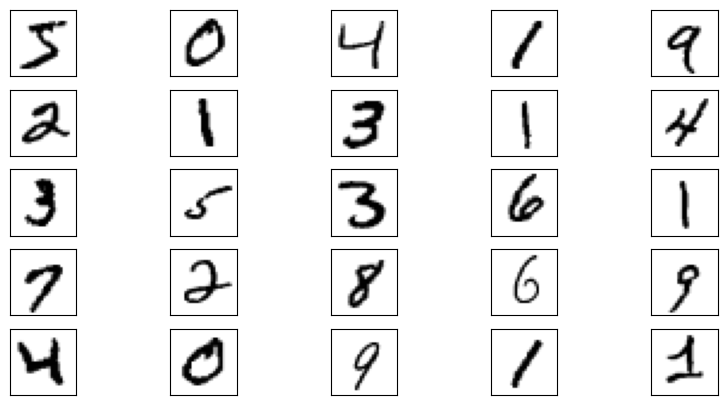

In [50]:
plt.figure(figsize=(10, 5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

Преобразование входных значений в векторы по категориям

In [51]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Формирование модели НС и вывод ее структуры

In [52]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
print(model.summary())

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


Компиляция НС с оптимизацией по Adam и критерием - категориальная кросс-энтропия

In [53]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Запуск процессса обучения 80% - обучающая подборка, 20% - выборка валидации

In [54]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8565 - loss: 0.4910 - val_accuracy: 0.9572 - val_loss: 0.1521
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9608 - loss: 0.1360 - val_accuracy: 0.9663 - val_loss: 0.1171
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9729 - loss: 0.0927 - val_accuracy: 0.9690 - val_loss: 0.1054
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9803 - loss: 0.0658 - val_accuracy: 0.9718 - val_loss: 0.0972
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9845 - loss: 0.0504 - val_accuracy: 0.9708 - val_loss: 0.1033


In [55]:
model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.9684 - loss: 0.1071


[0.09044790267944336, 0.972000002861023]

Проверка распознания цифр

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[1.06882474e-07 8.32831972e-08 6.45253676e-05 4.87332291e-04
  1.58229610e-10 2.38557902e-07 2.72449485e-09 9.99445736e-01
  5.83856661e-07 1.47273988e-06]]
Распознанная цифра: 7


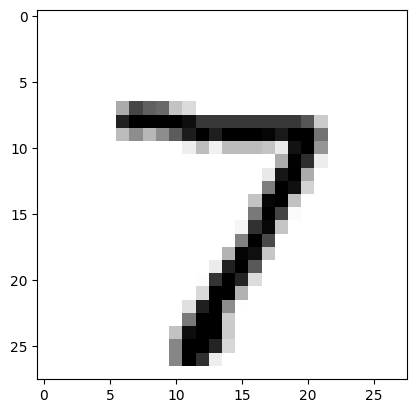

In [61]:
n = 0
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(f'Распознанная цифра: {np.argmax(res)}')

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

Распознание всей тестовой выборки

In [62]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
print(pred.shape)
print(pred[:20])
print(y_test[:20])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Выделение неверных вариантов

In [63]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(280, 28, 28)


Вывод первых 5 неверных результатов

Значение сети: 7


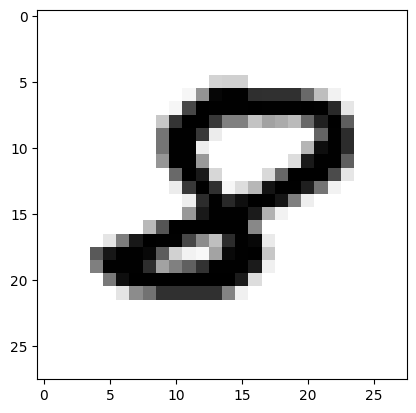

Значение сети: 2


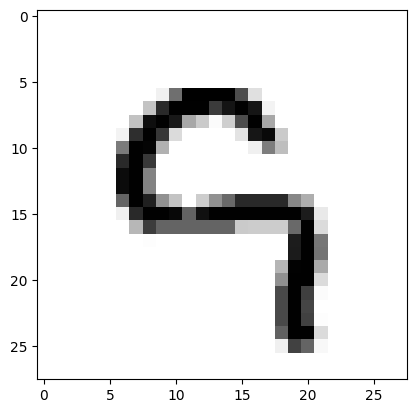

Значение сети: 1


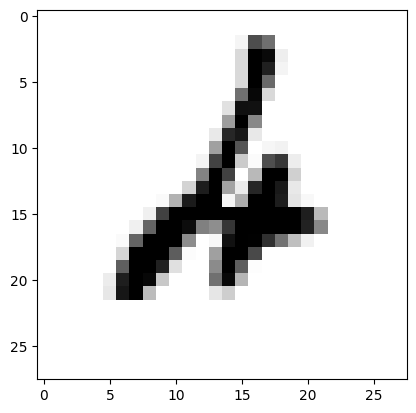

Значение сети: 0


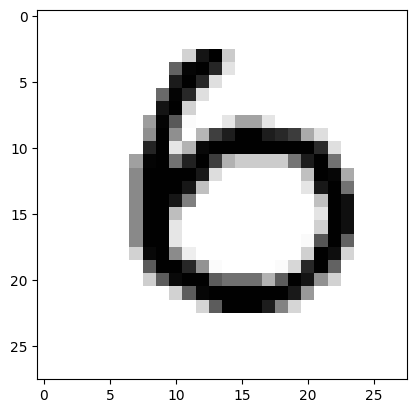

Значение сети: 4


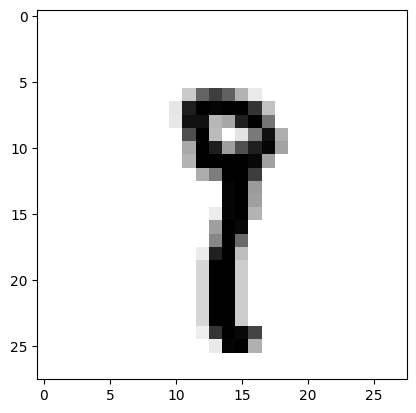

In [64]:
for i in range(5):
    print('Значение сети: '+str(y_test[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()